![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 13 - Bayesian Regression </center>
### <center> Kernel Bayesian Regression </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/13_BayesianRegression/MainKernelBayesianRegreesion.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Generate some data:
$$\mathcal{D}_{\text{train}}=\left\{ \left(x_{i},y_{i}\right)\right\} _{i=1}^{N}$$
$$y_{i}=f\left(x_{i}\right)+\epsilon_{i}$$

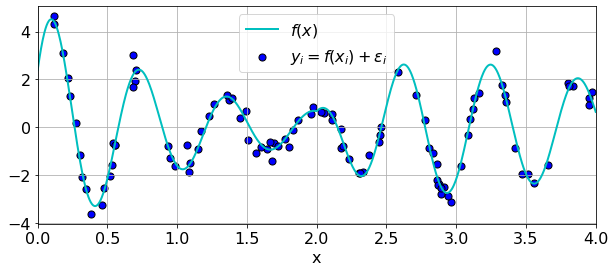

In [2]:
def f(vX):
    return 5 * np.exp(-vX) * np.sin(10*vX + .5) * (1 + (vX > 2) * 10 * (vX - 2))

M     = 1001;
vX0   = np.linspace(0, 4, M);

N   = 100
σ_ε = 0.3
vX  = 4 * np.random.rand(N)
vY  = f(vX) + σ_ε * np.random.randn(N)

plt.figure(figsize=(10, 4))
plt.plot(vX0, f(vX0), 'c', lw=2, label='$f(x)$')
plt.scatter(vX, vY, s=50, c='b', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
plt.xlabel('x')
plt.xlim([0, 4])
plt.grid()
plt.legend()
plt.show()

### Define a kernel:

In [3]:
from scipy.spatial.distance import cdist

#-- Gaussian kernel:
def k(mX1, mX2, σ):
    mD = cdist(mX2, mX1)
    return np.exp(-mD**2 / (2 * σ**2))

### For each $x_0$ compute $f_{Y_{0}|\underline{Y}}\left(y_{0}|\boldsymbol{y}\right)$:
$$\boxed{f_{Y_{0}|\underline{Y}}\left(y_{0}|\boldsymbol{y}\right)=\mathcal{N}\left(y_{0}|\mu_{y_{0}},\sigma_{y_{0}}^{2}\right)}$$
$$\mu_{y_{0}}=\boldsymbol{k}_{0}^{T}\left(\boldsymbol{K}+\frac{\sigma_{\epsilon}^{2}}{\sigma_{w}^{2}}\boldsymbol{I}\right)^{-1}\boldsymbol{y}$$
$$\sigma_{y_{0}}^{2}=k_{0,0}-\boldsymbol{k}_{0}^{T}\left(\boldsymbol{K}+\frac{\sigma_{\epsilon}^{2}}{\sigma_{w}^{2}}\boldsymbol{I}\right)^{-1}\boldsymbol{k}_{0}+\sigma_{\epsilon}^{2}$$
where:
$$\boldsymbol{K}\left[i,j\right]=k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)$$
$$\boldsymbol{k}_{0}\left[i\right]=k\left(\boldsymbol{x}_{0},\boldsymbol{x}_{i}\right)$$
$$k_{0,0}=k\left(\boldsymbol{x}_{0},\boldsymbol{x}_{0}\right)$$

In [4]:
σ_w   = 10 #-- regulariztion
σ     = .3
mK    = k(vX[:,None], vX[:,None], σ)
mInvK = np.linalg.inv(mK + (σ_ε / σ_w)**2 * np.eye(N))

mK0   = k(vX0[:,None], vX[:,None], σ)

vY0   = (mK0.T @ mInvK @ vY[:,None]).squeeze()
vVar0 = 1 - np.sum((mK0.T @ mInvK) * mK0.T, axis=1) + σ_ε**2
vσ0   = np.sqrt(vVar0)

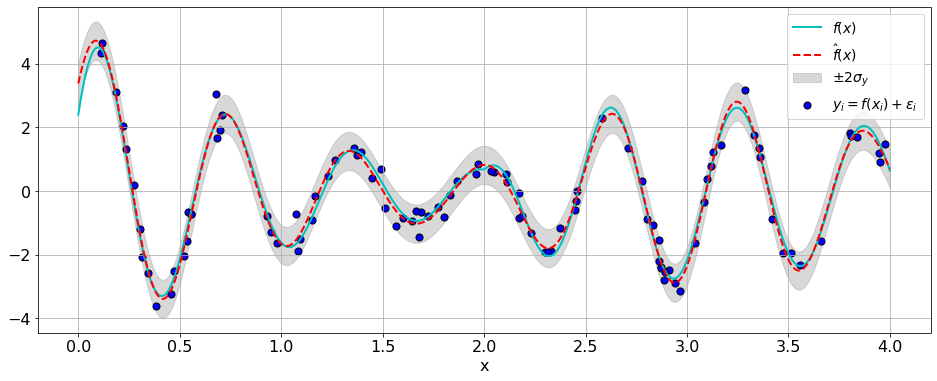

In [5]:
plt.figure(figsize=(16, 6))
plt.fill_between(vX0, vY0 - 2*vσ0, vY0 + 2*vσ0, color='gray', alpha=0.3, label='$\pm 2\sigma_{y}$')
plt.plot(vX0, f(vX0), 'c',   lw=2,                                       label='$f(x)$')
plt.plot(vX0, vY0,    '--r', lw=2,                                       label='$\hat{f}(x)$')
plt.scatter(vX, vY, s=50, c='b', edgecolor='k',                          label='$y_i = f(x_i) + \epsilon_i$')
plt.xlabel('x')
plt.grid()
plt.legend(fontsize=14)
plt.show()

### Put it all together:

In [6]:
N2  = 100
vX2 = 4 * np.random.rand(N2)
vZ  = np.random.randn(N2)

def PlotBayesianRegression(N, σ_ε, σ_w, σ):
    vX  = vX2[:N]
    vY  = f(vX) + σ_ε * vZ[:N]
    
    mK    = k(vX[:,None], vX[:,None], σ)
    mInvK = np.linalg.inv(mK + (σ_ε / σ_w)**2 * np.eye(N))
    mK0   = k(vX0[:,None], vX[:,None], σ)
    
    vY0 = (mK0.T @ mInvK @ vY[:,None]).squeeze()
    vVar0 = 1 - np.sum((mK0.T @ mInvK) * mK0.T, axis=1) + σ_ε**2
    vσ0   = np.sqrt(vVar0)
    
    #-- Plot:
    plt.figure(figsize=(16, 6))
    plt.scatter(vX, vY, s=50, c='b', edgecolor='k',                          label='$y_i = f(x_i) + \epsilon_i$')
    plt.plot(vX0, f(vX0), 'c', lw=2,                                         label='$f(x)$')
    plt.plot(vX0, vY0,    'r', lw=2,                                         label='$\hat{f}(x)$')
    plt.fill_between(vX0, vY0 - 2*vσ0, vY0 + 2*vσ0, color='gray', alpha=0.3, label='$\pm 2\sigma_{y}$')
    plt.xlabel('x')
    plt.grid()
    plt.legend(fontsize=14)    

In [7]:
from ipywidgets import interact, IntSlider, FloatSlider, Layout

nSlider  = IntSlider  (min=1,    max=N2, step=1,    value=1,    layout=Layout(width='80%'))
σεSlider = FloatSlider(min=0.05, max=1,  step=0.05, value=0.05, layout=Layout(width='80%'))
σwSlider = FloatSlider(min=0.05, max=2,  step=0.05, value=1,    layout=Layout(width='80%'))
σSlider  = FloatSlider(min=0.05, max=1,  step=0.05, value=0.05, layout=Layout(width='80%'))
interact(PlotBayesianRegression, N=nSlider, σ_ε=σεSlider, σ_w=σwSlider, σ=σSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='N', layout=Layout(width='80%'), min=1), FloatSlider(valu…

### Boston data:

In [8]:
from sklearn.datasets import load_boston

mX, vY = load_boston(return_X_y=True)
mX.shape, vY.shape

((506, 13), (506,))

In [9]:
N   = mX.shape[0]
mX -= mX.mean(axis=0)
mX /= mX.std(axis=0)
vY -= vY.mean()
vY /= vY.std()

In [10]:
def KernelBaysesianRegression(mX, vY, mX0, λ, k):
    N     = mX.shape[0]
    mK    = k(mX, mX)
    mInvK = np.linalg.inv(mK + λ * np.eye(N))
    mK0   = k(mX0, mX)

    vY0 = (mK0.T @ mInvK @ vY[:,None]).squeeze()
    vVar0 = 1 - np.sum((mK0.T @ mInvK) * mK0.T, axis=1) + σ_ε**2
    vσ0   = np.sqrt(vVar0)
    
    return (vY0, vσ0)

#### Leave-one-out cross validation:

In [11]:
λ   = .01
σ   = .65 * np.median(cdist(mX, mX))
def GaussianKernel(mX1, mX2):
    return k(mX1, mX2, σ)

vHatY  = np.full(N, np.nan)
for ii in range(N):
    print(f'{N-ii:03d}', end='\r')
    mXi          = np.delete(mX, ii, 0)
    vYi          = np.delete(vY, ii)
    vX0          = mX[ii,:]
    vHatY[ii], _ = KernelBaysesianRegression(mXi, vYi, vX0[None,:], λ, GaussianKernel)

In [12]:
from sklearn.metrics import r2_score

r2_score(vY, vHatY)

0.9017482505492003

### Exercise: Kernel regression with Sk-learn:
* Use sklearn `KernelRidge` and train a regressor on the Boston data
* Read and play with the possible hyper-parameters
* Try to achieve a better $R^2$ score (than the manual implementation)


In [15]:
from sklearn.kernel_ridge    import KernelRidge
from sklearn.model_selection import cross_val_predict, KFold

???

Object `?` not found.


In [14]:
# vHatY = cross_val_predict(KernelRidge(kernel='rbf', gamma=b0.06, alpha=c0.016), mX, vY, cv=KFold(len(vY)))